In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


In [58]:
bbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3 non-null      int64  
 1   Image Index    3 non-null      object 
 2   Finding Label  3 non-null      object 
 3   Bbox [x        3 non-null      float64
 4   y              3 non-null      float64
 5   w              3 non-null      float64
 6   h]             3 non-null      float64
 7   pixels         3 non-null      object 
dtypes: float64(4), int64(1), object(3)
memory usage: 320.0+ bytes


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

In [3]:
from pydicom import dcmread

In [11]:
bbox['pixels'] = bbox.apply(lambda x: dcmread(x['Image Index']).pixel_array, axis=1)
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h],pixels
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111,"[[219, 214, 219, 215, 212, 210, 204, 206, 202,..."
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000,"[[21, 20, 19, 16, 13, 12, 10, 10, 8, 5, 4, 3, ..."
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333,"[[5, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 9, 9, 8..."


<IPython.core.display.Javascript object>


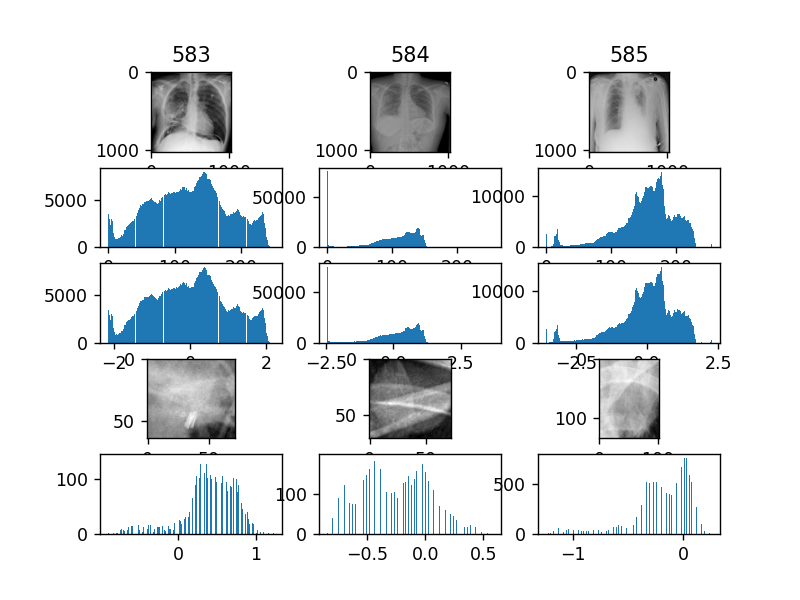

In [62]:
fig = plt.figure()

for i,row in bbox.iterrows():
    pixels = row['pixels']
    
    subplt = fig.add_subplot(5, len(bbox), i+1)
    plt.imshow(pixels, cmap='gray')
    subplt.set_title(str(row[0]))
    
    fig.add_subplot(5, len(bbox), len(bbox)+i+1)
    plt.hist(pixels.ravel(), bins=256)
    
    m = np.mean(pixels)
    s = np.std(pixels)
    norm = (pixels - m)/s
    fig.add_subplot(5, len(bbox), 2*len(bbox)+i+1)
    plt.hist(norm.ravel(), bins=256)
    
    y1 = int(row['y'])
    y2 = y1 + int(row['h]'])
    x1 = int(row['Bbox [x'])
    x2 = x1 + int(row['w'])
    mass = pixels[y1:y2,x1:x2]
    fig.add_subplot(5, len(bbox), 3*len(bbox)+i+1)
    plt.imshow(mass, cmap='gray')
    
    massn = norm[y1:y2,x1:x2]
    fig.add_subplot(5, len(bbox), 4*len(bbox)+i+1)
    plt.hist(massn.ravel(), bins=256)

